(-0.5, 49.5, 49.5, -0.5)

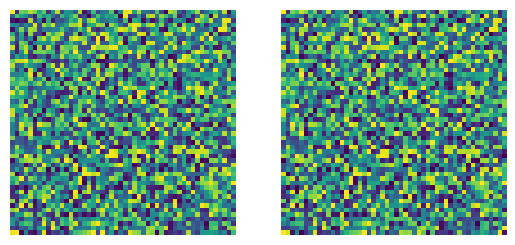

In [3]:
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt


# Step 1: Create a random 50 x 50 array with values in the range of 0-255 (grayscale image)
random_array = np.random.randint(0, 256, (50, 50), dtype=np.uint8)

# Step 2: Convert the array to an image
image = Image.fromarray(random_array)

# Step 3: Save the image in memory with JPEG compression
buffer = io.BytesIO()
image.save(buffer, format='JPEG', quality=70)  # Adjust quality as needed (1-100)
buffer.seek(0)

# Step 4: Load the compressed image back into a NumPy array
compressed_image = Image.open(buffer)
compressed_array = np.array(compressed_image)

# Display original and compressed arrays to compare (optional)
# print("Original Array:\n", random_array)
# print("Compressed Array:\n", compressed_array)
plt.subplot(1, 2, 1)
plt.imshow(random_array)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(compressed_array)
plt.axis('off')


In [4]:
original_size_bytes = random_array.nbytes
print("Original Array Size (in bytes):", original_size_bytes)
compressed_size_bytes = buffer.tell()  # Get the size of the compressed data
print("Compressed Image Size (in bytes):", compressed_size_bytes)

Original Array Size (in bytes): 2500
Compressed Image Size (in bytes): 1871


In [5]:
import torch 
model = torch.load('results/image_1/best_model_1.pt', map_location=torch.device('cpu'))

In [6]:
import torch

# Assuming `model` is already loaded and contains the weights and biases

all_weights = []

# Iterate over model items
for layer_name, weights in model.items():
    weights_np = weights.detach().cpu().numpy()  # Convert to NumPy array

    # Check if the current layer has a corresponding bias
    if 'weight' in layer_name:
        # Find the bias name (assuming it follows a known naming convention)
        bias_name = layer_name.replace('weight', 'bias')
        if bias_name in model:
            bias_np = model[bias_name].detach().cpu().numpy()

            # Expand bias to match the weight matrix dimensions for concatenation
            bias_np_expanded = bias_np.reshape(1, -1)  # Make it a row vector for concatenation

            # Concatenate the weights and biases (along the columns)
            merged_matrix = np.concatenate((weights_np, bias_np_expanded.T), axis=1)
        else:
            merged_matrix = weights_np  # No bias found, use only weights
    else:
        continue  # Skip if it's not a weight matrix

    # Append the merged matrix to the all_weights list
    all_weights.append(merged_matrix)
    #print(f"Merged matrix for {layer_name} (shape {merged_matrix.shape}):\n{merged_matrix}\n")
    # print(merged_matrix.shape)

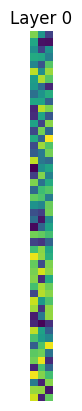

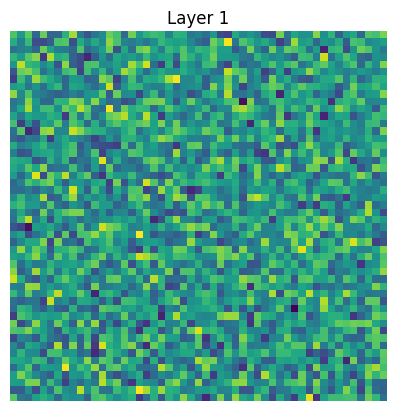

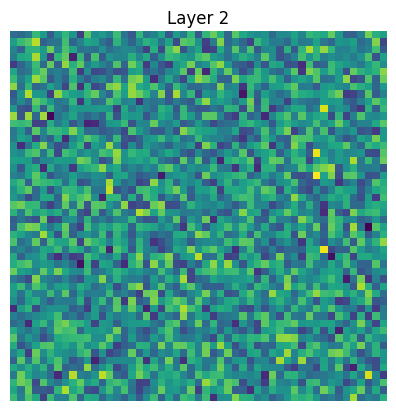

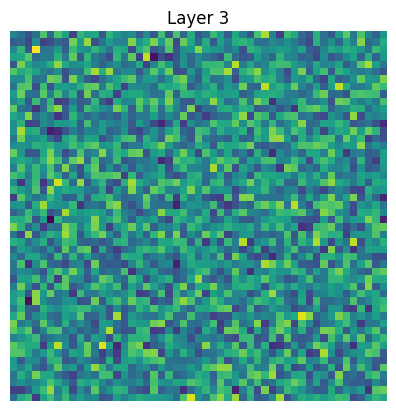

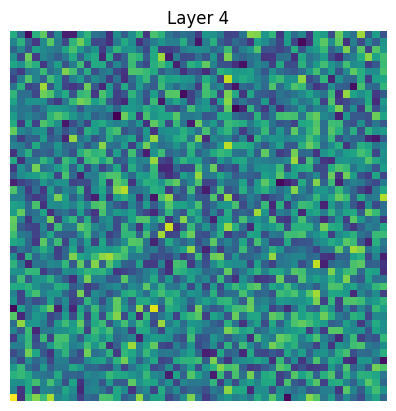

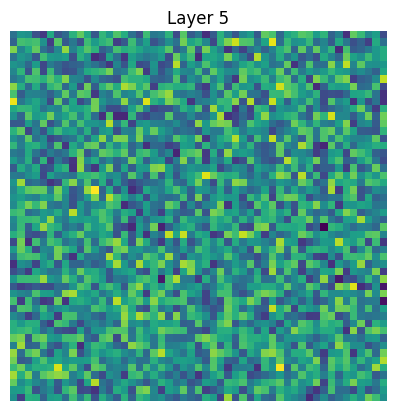

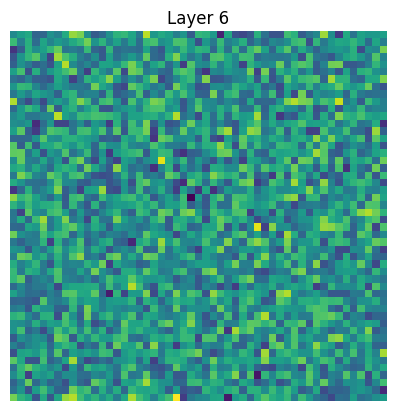

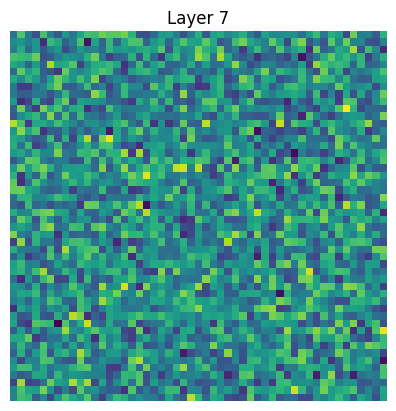

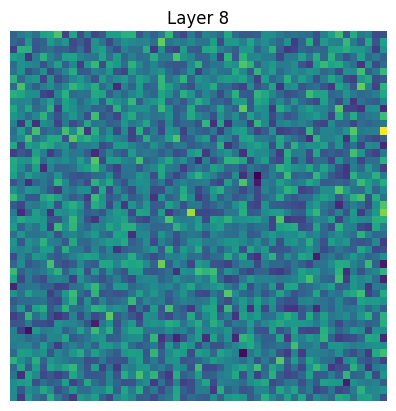

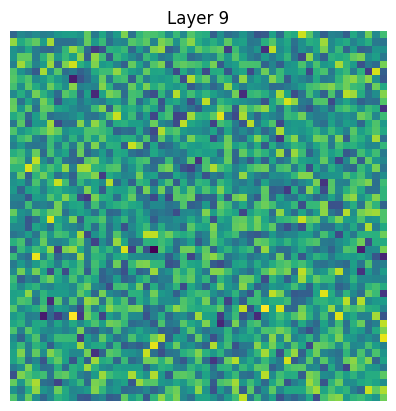

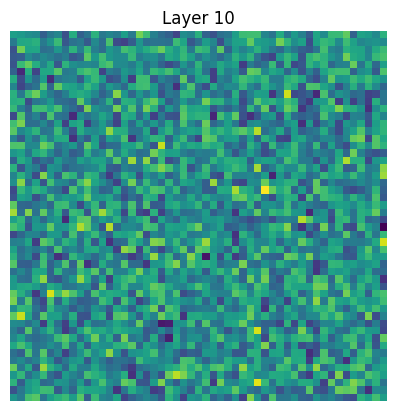

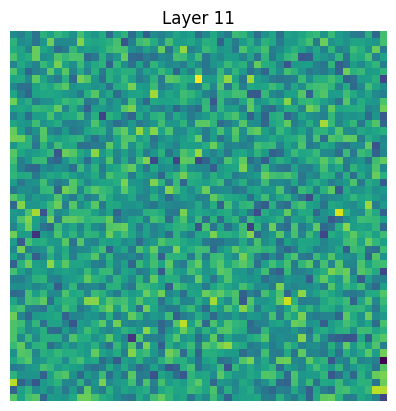

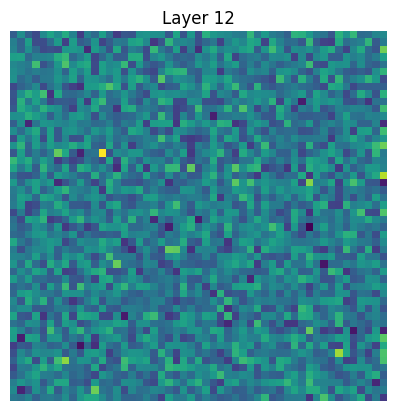

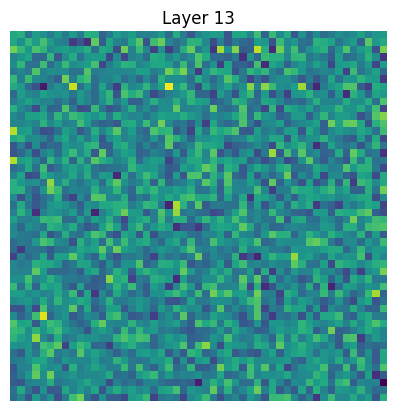

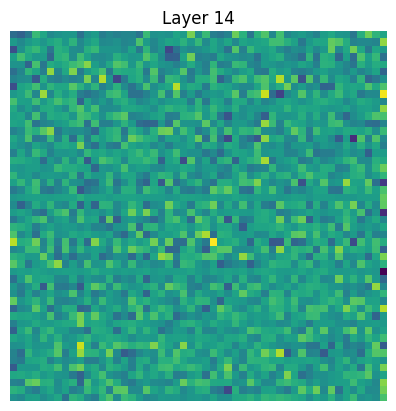

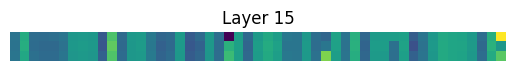

In [7]:
for i in range(len(all_weights)):
    plt.figure()
    plt.imshow(all_weights[i])
    plt.title(f'Layer {i}')
    plt.axis('off')
    plt.show()

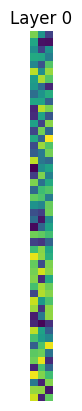

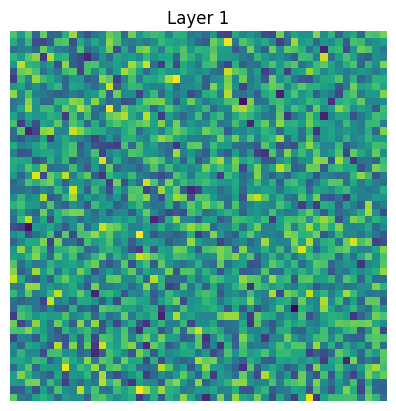

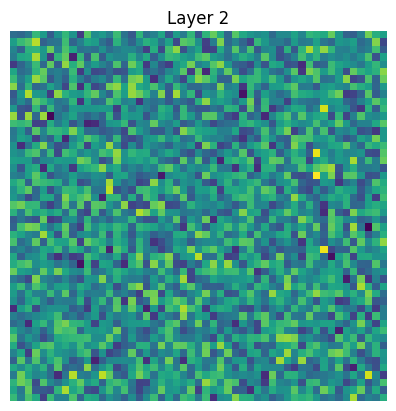

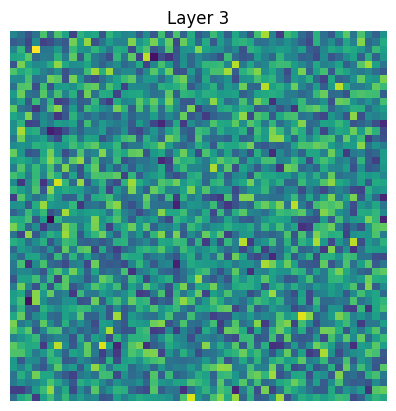

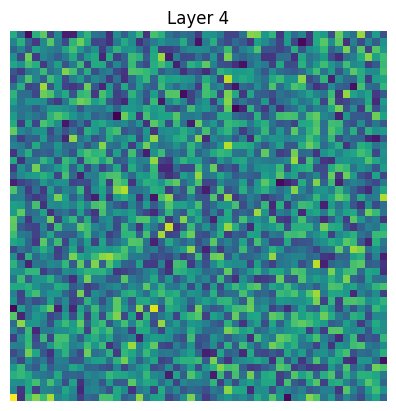

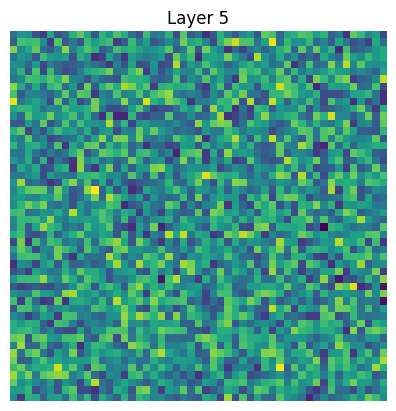

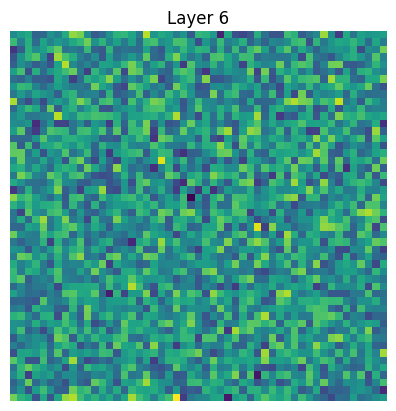

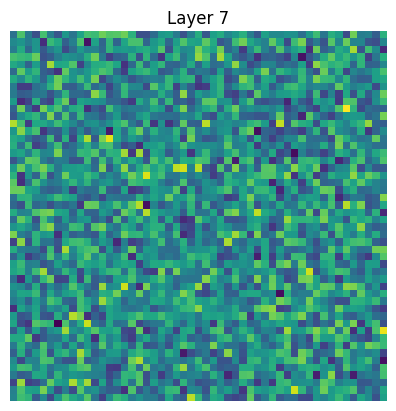

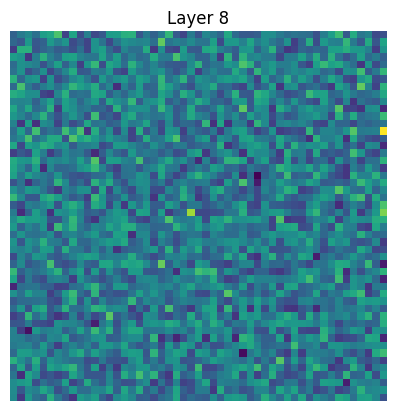

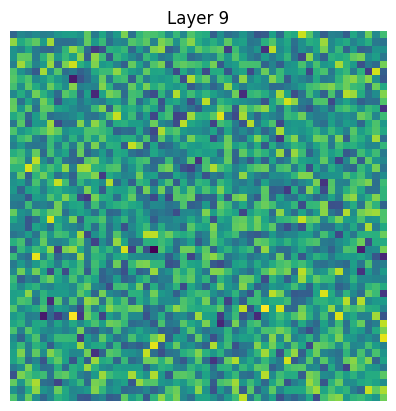

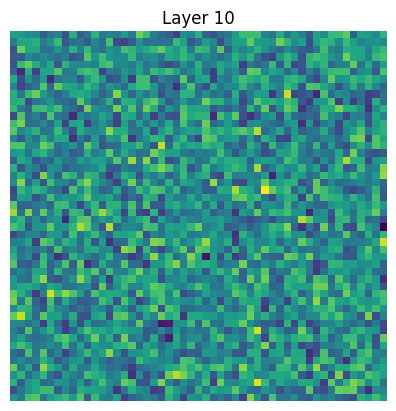

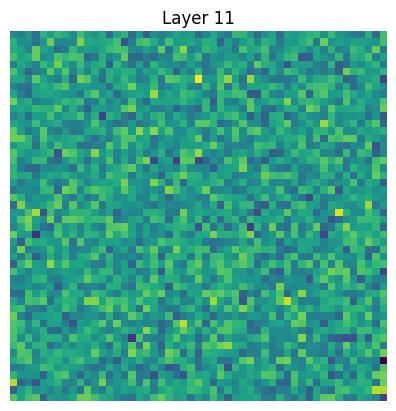

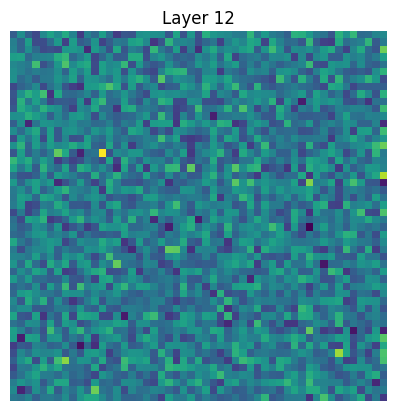

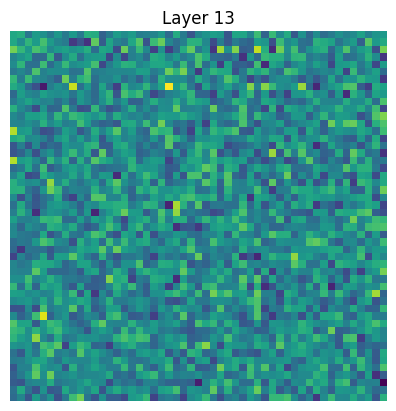

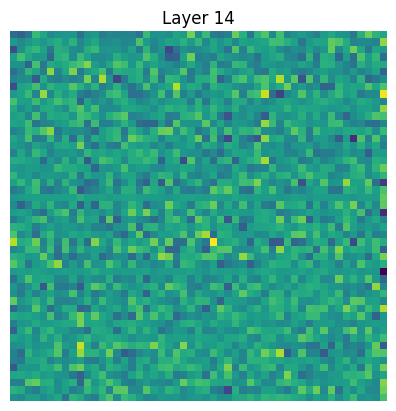

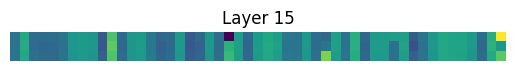

In [8]:
for i in range(len(all_weights)):
    # Normalize and convert to uint8
    normalized_array = ((all_weights[i] - all_weights[i].min()) / 
                        (all_weights[i].max() - all_weights[i].min()) * 255).astype(np.uint8)

    # Create image from the normalized array
    image = Image.fromarray(normalized_array)
    buffer = io.BytesIO()
    image.save(buffer, format='JPEG', quality=85)  # Adjust quality as needed (1-100)
    buffer.seek(0)
    compressed_image = Image.open(buffer)
    compressed_array = np.array(compressed_image)

    # Display the original matrix as an image
    plt.figure()
    plt.imshow(normalized_array)  
    plt.title(f'Layer {i}')
    plt.axis('off')
    plt.show()

In [9]:
from scipy.fftpack import dct, idct

y = dct(all_weights[1])
y

array([[-0.00619792,  0.02223459,  0.119518  , ...,  0.04690814,
         0.04908391,  0.07307835],
       [-0.00619534, -0.04047095, -0.0695392 , ...,  0.08886313,
        -0.07965781, -0.06602231],
       [ 0.04032978, -0.04882786, -0.12002531, ..., -0.05295768,
        -0.02096475, -0.16460814],
       ...,
       [ 0.03353428, -0.00251648, -0.06981175, ...,  0.09460241,
         0.07817444, -0.07319267],
       [-0.04615198,  0.08514202, -0.12872213, ..., -0.02145698,
        -0.00936409,  0.02648669],
       [ 0.0005566 , -0.0613156 ,  0.05246802, ...,  0.04925845,
        -0.12642291,  0.01268862]], dtype=float32)